# Used Car Price Prediction

In [1]:
# Downloading Nessassary Libraries
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

# VIsualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

###

## Data Preprocessing

### Loading Dataset

In [3]:
used_car_dataset = 'https://raw.githubusercontent.com/PythoPrince/Used-Car-Price-Prediction_Prince/main/used_car_dataset.csv'

df = pd.read_csv(used_car_dataset)

In [4]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [6]:
# Counting, number of rows and columns
print("Number of rows : ",df.shape[0])
print("Number of columns : ",df.shape[1])

Number of rows :  2105
Number of columns :  6


###

### Handling Missing Values

In [7]:
# Counting Missing/Null Values 
Missing_Value = df.isnull().sum()
print(Missing_Value)

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64


In [8]:
# Counting Duplicate Values
Duplicate_Value = df.duplicated().sum()
print(f'Number of duplicated rows are = {Duplicate_Value}')

Number of duplicated rows are = 92


In [9]:
df = df.drop_duplicates()

# Checking Again
print(df.shape)
print("Number of Duplicate values are =" ,df.duplicated().sum())

(2013, 6)
Number of Duplicate values are = 0


###

### Data Cleaning for kms_driven

In [10]:
import re # It Provides support for working with regular expressions

# Function to convert strings to integers
def preprocess_string(s):
    s = re.sub(r'[^\d.]', '',s)
    
    return float(s)
               

In [11]:
# Now preprocess "car_price_in_rupees" column

df['kms_driven'] = df['kms_driven'].apply(preprocess_string).astype(int)


# Now preprocess "car_price_in_rupees" column

df['car_price_in_rupees'] = df['car_price_in_rupees'].apply(preprocess_string)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_price_in_rupees  2013 non-null   float64
 2   kms_driven           2013 non-null   int64  
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 110.1+ KB


- #### Removing Outliers

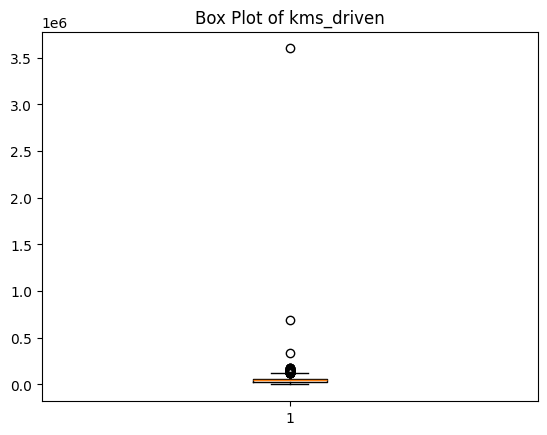

In [13]:
# Visualizing Data
plt.boxplot(df['kms_driven'])
plt.title('Box Plot of kms_driven')
plt.show()

In [14]:
# Identifing Outliers using IQR
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
df_filtered = df[(df['kms_driven'] >= Q1 - 1.5 * IQR) & (df['kms_driven'] <= Q3 + 1.5 * IQR)]

df = df_filtered



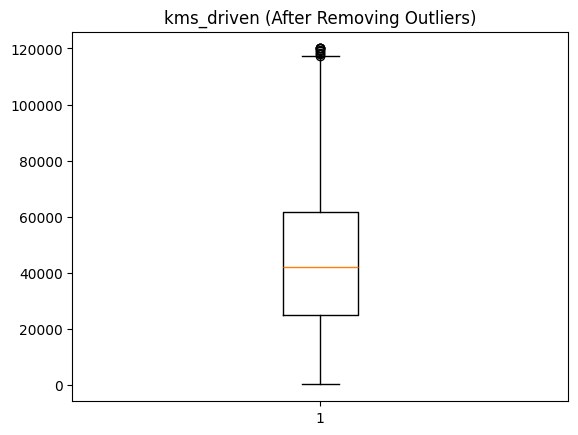

In [15]:
# Visualizing Data After Removing Outliers
plt.boxplot(df['kms_driven'])
plt.title('kms_driven (After Removing Outliers)')
plt.show()

In [16]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Petrol,Kolkata,2019


###

### Data Cleaning for fuel_type

In [17]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Diesel + 1',
       'Hybrid', 'LPG'], dtype=object)

In [18]:
df['fuel_type'].describe()

count       1975
unique         8
top       Petrol
freq        1276
Name: fuel_type, dtype: object

<Axes: xlabel='fuel_type', ylabel='Count'>

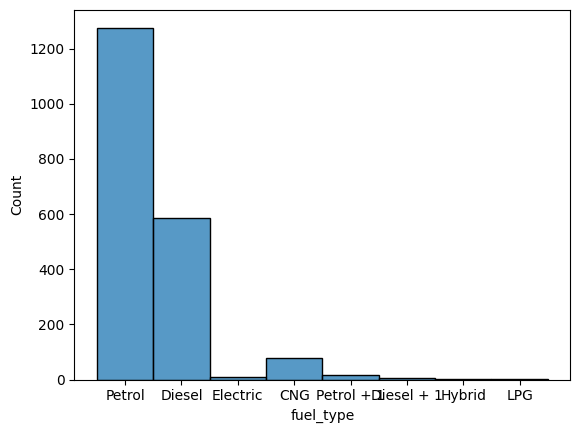

In [19]:
sns.histplot(df['fuel_type'])

In [20]:
df.drop(columns=['fuel_type'], inplace=True)

In [21]:
df.head()

,car_name,car_price_in_rupees,kms_driven,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,2019


In [22]:
df.shape

(1975, 5)

###

### Data Cleaning for year_of_manufacture

In [23]:
df['age_of_car'] = df.apply(lambda row: 2024 - row["year_of_manufacture"], axis=1)

In [24]:
df.drop(columns=['year_of_manufacture'], inplace=True)

In [25]:
df.head()

,car_name,car_price_in_rupees,kms_driven,city,age_of_car
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,8
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,5
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,3
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,5


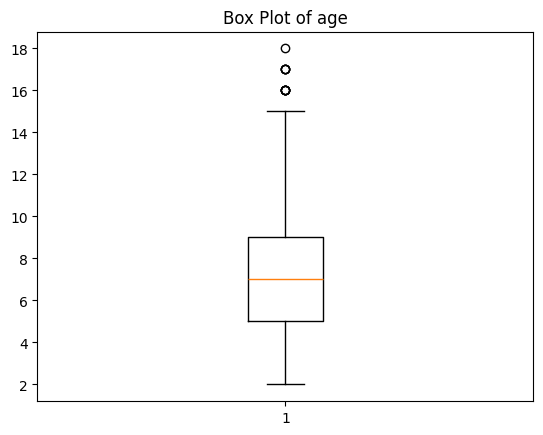

In [26]:
# Visualizing Data
plt.boxplot(df['age_of_car'])
plt.title('Box Plot of age')
plt.show()

In [27]:
# Identifing Outliers using IQR
Q1 = df['age_of_car'].quantile(0.25)
Q3 = df['age_of_car'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
df_filtered = df[(df['age_of_car'] >= Q1 - 1.5 * IQR) & (df['age_of_car'] <= Q3 + 1.5 * IQR)]

df = df_filtered

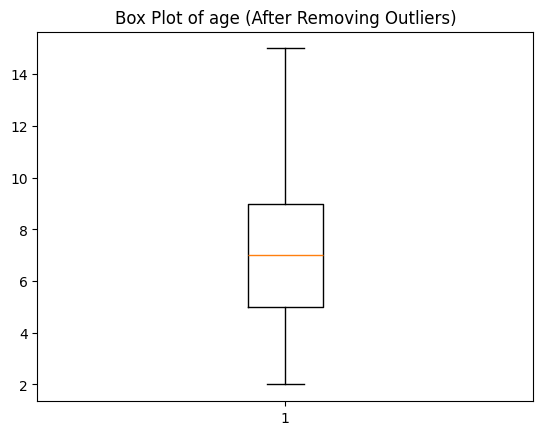

In [28]:
# Visualizing Data After Removing Outliers
plt.boxplot(df['age_of_car'])
plt.title('Box Plot of age (After Removing Outliers)')
plt.show()

In [29]:
df.shape

(1964, 5)

###

### Data Cleaning for car_name

In [30]:
df.insert(1, "car_brand", df["car_name"].str.split(" ").str[0])

df.car_brand.unique()

# List of car brands based on subjective ranking
car_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Toyota', 'Volkswagen', 'Porsche', 'Volvo', 'Jaguar', 'Land', 
              'Ford', 'Honda', 'Chevrolet', 'Hyundai', 'Kia', 'Nissan', 'Renault', 'Skoda', 'MINI', 'MG', 'Mahindra',
              'Tata', 'Isuzu', 'Jeep', 'Datsun', 'Fiat', 'Citroen', 'Bentley','Maruti']

# Loop through the mapping and perform replacements
for brand_name in car_brands:
    df.loc[df["car_brand"] == brand_name, "car_brand"] = ((car_brands.index(brand_name) + 1) / len(df)) * 100

df.rename(columns={'car_brand': 'car_brand_score'}, inplace=True)

df.drop(columns=['car_name'], inplace=True)

In [31]:
df.head()

,car_brand_score,car_price_in_rupees,kms_driven,city,age_of_car
0,0.661914,4.45,22402,Mumbai,8
1,1.425662,2.93,10344,Kolkata,5
2,1.069246,22.49,12999,Bangalore,3
3,1.425662,6.95,45000,Thane,8
4,1.171079,12.00,11193,Kolkata,5


###

### Data Cleaning for city

- ##### For now droping city column

In [32]:
df.drop(columns=['city'], inplace=True)

In [33]:
df.head()

,car_brand_score,car_price_in_rupees,kms_driven,age_of_car
0,0.661914,4.45,22402,8
1,1.425662,2.93,10344,5
2,1.069246,22.49,12999,3
3,1.425662,6.95,45000,8
4,1.171079,12.00,11193,5


###

## Independent And dependent features

In [34]:
X=df.drop('car_price_in_rupees',axis=1)
y=df['car_price_in_rupees']

In [35]:
X.head()

,car_brand_score,kms_driven,age_of_car
0,0.661914,22402,8
1,1.425662,10344,5
2,1.069246,12999,3
3,1.425662,45000,8
4,1.171079,11193,5


In [36]:
y.head()

0     4.45
1     2.93
2    22.49
3     6.95
4    12.00
Name: car_price_in_rupees, dtype: float64

###

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
X_train.shape,X_test.shape

((1374, 3), (590, 3))

In [39]:
y_train.shape,y_test.shape

((1374,), (590,))

###

## Check for correlation

<Axes: >

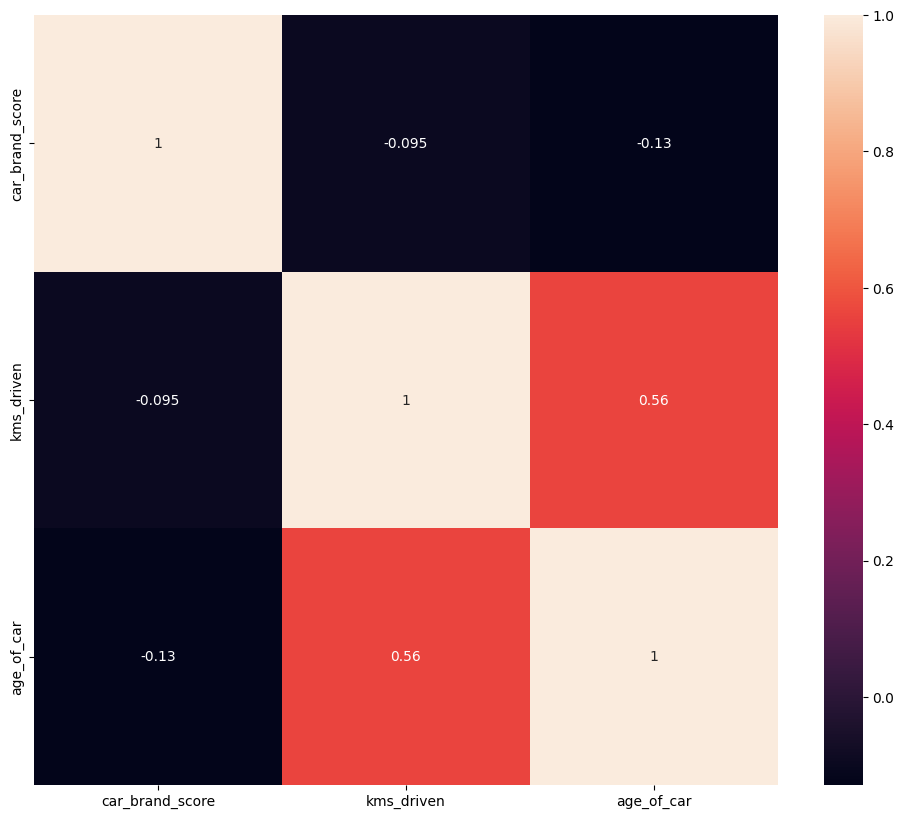

In [40]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

###

## Doing Standardization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
X_train_scaled

array([[-0.3548887 , -0.97399831, -0.34007262],
       [-0.3548887 ,  0.90032946,  1.52449154],
       [-1.38458218, -0.37140834,  2.27031721],
       ...,
       [-0.3548887 , -0.05954765, -0.34007262],
       [ 1.3612671 ,  0.35403584,  0.03284021],
       [-1.04135102,  0.94279508, -0.34007262]])

- ### Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'After Scaling')

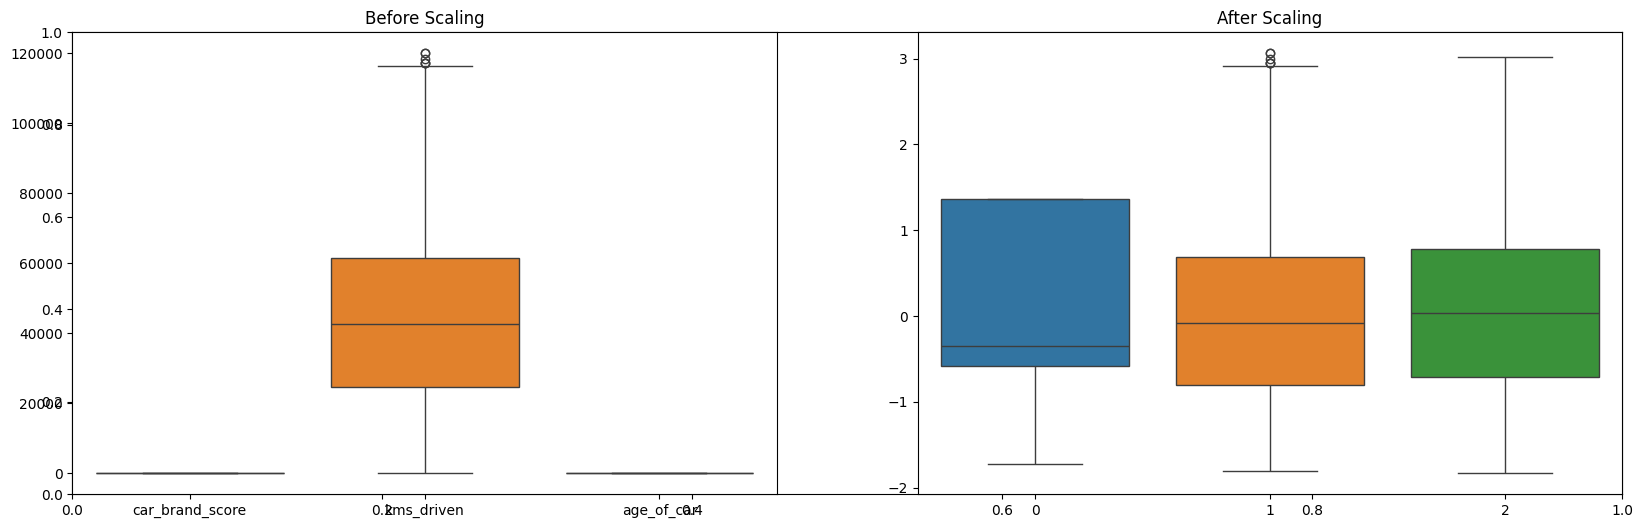

In [43]:
plt.subplots(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')

###

## Creating ML Model using Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
rf.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = rf.predict(X_test_scaled)


## Plotting

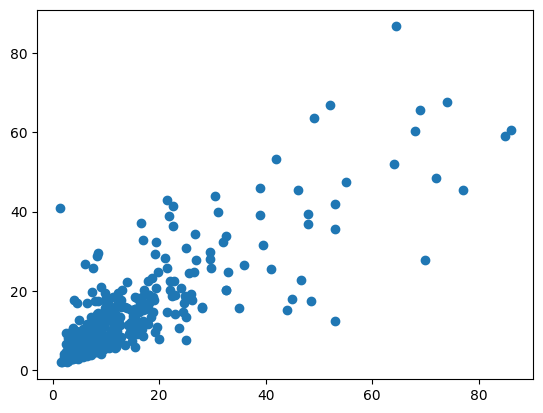

In [50]:
plt.scatter(y_test,y_pred)

## Evaluating the model

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [52]:
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 3.6500643724778055
R2 Score 0.7158724104767629
